# Vertex embeddings of the corpus callosum produced by the omnibus embedding

In [1]:
%load_ext nb_black
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from graspologic.embed import OmnibusEmbed
from graspologic.datasets import load_mice

from pairplot import ellipse_pairgrid

%matplotlib inline

<IPython.core.display.Javascript object>

In [3]:
# Load the full mouse dataset
mice = load_mice()

<IPython.core.display.Javascript object>

In [4]:
# Stack all adjacency matrices in a 3D numpy array
graphs = np.array(mice.graphs)

# Jointly embed graphs using omnibus embedding
embedder = OmnibusEmbed()
omni_embedding = embedder.fit_transform(graphs)
print(omni_embedding.shape)

(32, 332, 5)


<IPython.core.display.Javascript object>

In [5]:
# Sort embedding and labels so BTBR is first
label_indices = np.argsort(mice.labels).reshape(4, 8)
label_indices = label_indices[[1, 0, 2, 3]].reshape(-1)

labels = mice.labels[label_indices]
omni_embedding = omni_embedding[label_indices]

<IPython.core.display.Javascript object>

In [6]:
# Find the index of the corpus callosum
mice.atlas.query("Structure == 'Corpus_Callosum'").head()

,ROI,Structure,Abbreviation,c_R,c_G,c_B,c_A,Level_1,Level_2,Level_3,Level_4,Macrostructure
120,121,Corpus_Callosum,cc,0,255,79,255,white_matter_tracts,white_matter,forebrain_white_matter,prosencephalon_white_matter,white_matter


<IPython.core.display.Javascript object>

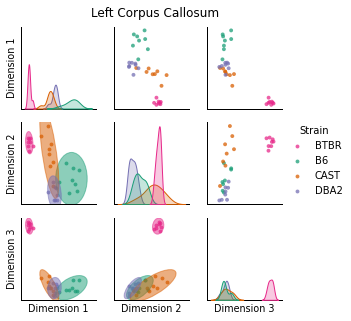

<IPython.core.display.Javascript object>

In [7]:
left = ellipse_pairgrid(omni_embedding[:, 120, :3], labels, ci=0.9)
left.savefig("figs/left_cc.pdf", bbox_inches="tight", dpi=300)

left.fig.suptitle("Left Corpus Callosum", y=1.025)
left.add_legend()
plt.show()

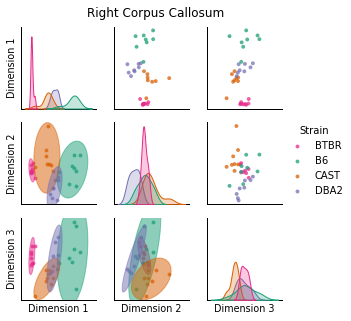

<IPython.core.display.Javascript object>

In [8]:
right = ellipse_pairgrid(omni_embedding[:, 120 + 166, :3], labels, ci=0.9)
right.add_legend()
right.savefig("figs/right_cc.pdf", bbox_inches="tight", dpi=300)

right.fig.suptitle("Right Corpus Callosum", y=1.025)
plt.show()